<a href="https://colab.research.google.com/github/Ronaldo-khagokpam/Machine-learning/blob/main/diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import the library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.shape

(768, 9)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull().sum()
df.describe()
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


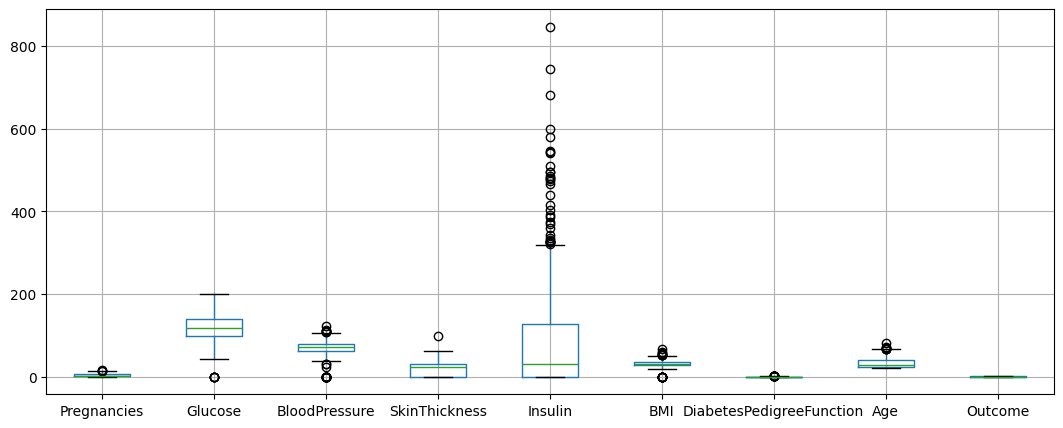

In [5]:
df.boxplot(figsize=(13,5))
plt.show()

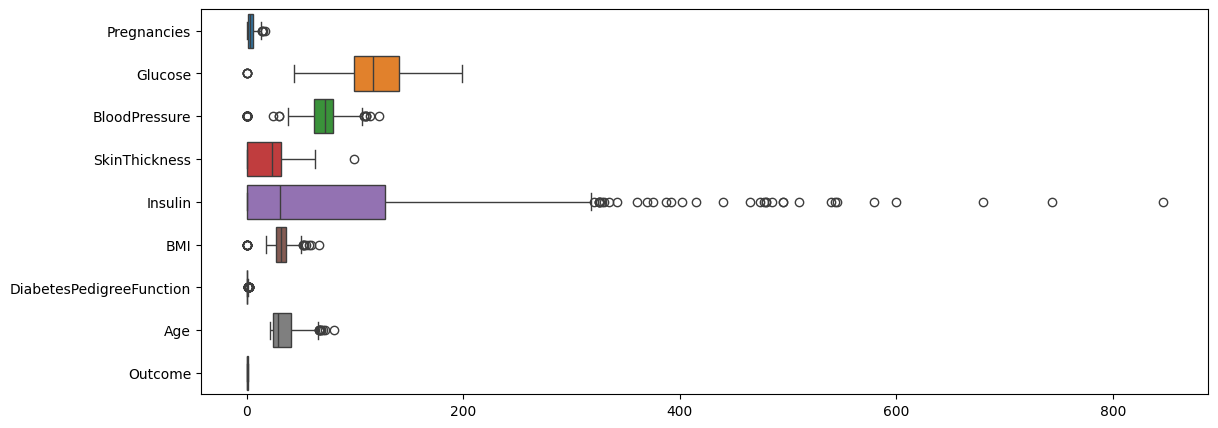

In [6]:
import seaborn as sns
plt.figure(figsize=(13,5))
sns.boxplot(data=df,orient='h')
plt.show()

In [7]:
#splitting  dataset into x_train,y_train
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [8]:
#replacing 0 with mean with respective columns
x.replace(to_replace=0,value=x.mean(),inplace=True)
x.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885
std,2.984162,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [ ]:
#splitting training data & testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,stratify=y,random_state=None)

In [ ]:
x_train
y_train

,Outcome
398,0
9,1
25,1
676,1
539,1
...,...
16,1
405,0
580,1
667,1


In [9]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_train_std=std.fit_transform(x_train)
x_test_std=std.fit_transform(x_test)

NameError: name 'x_train' is not defined

In [10]:
#training the model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train_std,y_train)

NameError: name 'x_train_std' is not defined

In [11]:
#prediction from the model
y_pred=model.predict(x_test_std)
y_pred
y_test
y_train

NameError: name 'x_test_std' is not defined

In [ ]:
#Accuracy calculation with logistic Regression
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

77.60416666666666

In [ ]:
#training model with decision tree
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
accuracy_score(y_test,y_pred)*100

77.60416666666666

In [ ]:
#training model with deep learning(MLP)
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()
mlp.fit(x_train,y_train)

MLPClassifier()

In [ ]:
y_pred=mlp.predict(x_test_std)
y_pred

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
accuracy_score(y_test,y_pred)*100

60.416666666666664